In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml_python/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ml_python/test.csv')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,53730,Male,49,First-time,Business,Business,1310,0,0.0,3,...,4,3,2,3,3,4,4,3,4,Neutral or Dissatisfied
84963,82113,Male,7,Returning,Personal,Economy Plus,650,0,0.0,3,...,2,1,4,1,1,4,2,1,3,Neutral or Dissatisfied
84964,54411,Female,19,Returning,Personal,Economy,363,0,0.0,5,...,5,5,3,5,5,5,3,5,5,Neutral or Dissatisfied
84965,15247,Male,58,Returning,Business,Business,3445,9,5.0,1,...,5,5,5,3,5,5,1,5,5,Satisfied


In [ ]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,84967.000000,84967.000000,84967.000000,84967.000000,84705.00000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000
mean,42483.000000,40.128426,1295.579531,14.044111,14.29147,3.030930,2.844963,3.412325,3.494580,2.975991,3.530029,3.601245,3.498205,3.427672,3.304389,3.745937,2.865465,3.545341,3.735744
std,24528.004498,14.467548,1051.170909,37.528018,37.85288,1.534362,1.462059,1.242356,1.352494,1.308296,1.259314,1.291335,1.289861,1.282953,1.311501,1.161421,1.429284,1.293977,1.167693
min,0.000000,7.000000,31.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21241.500000,29.000000,438.000000,0.000000,0.00000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000
50%,42483.000000,41.000000,925.000000,0.000000,0.00000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,63724.500000,51.000000,1979.000000,11.000000,12.00000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000
max,84966.000000,85.000000,4983.000000,1592.000000,1584.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,262
Departure and Arrival Time Convenience,0


### Боксплоты для числовых переменных

Построим боксплоты для числовых полей таблицы

Для каждой переменной видно распределение значений и выбросы.  
Большая часть переменных не имеет выбросов

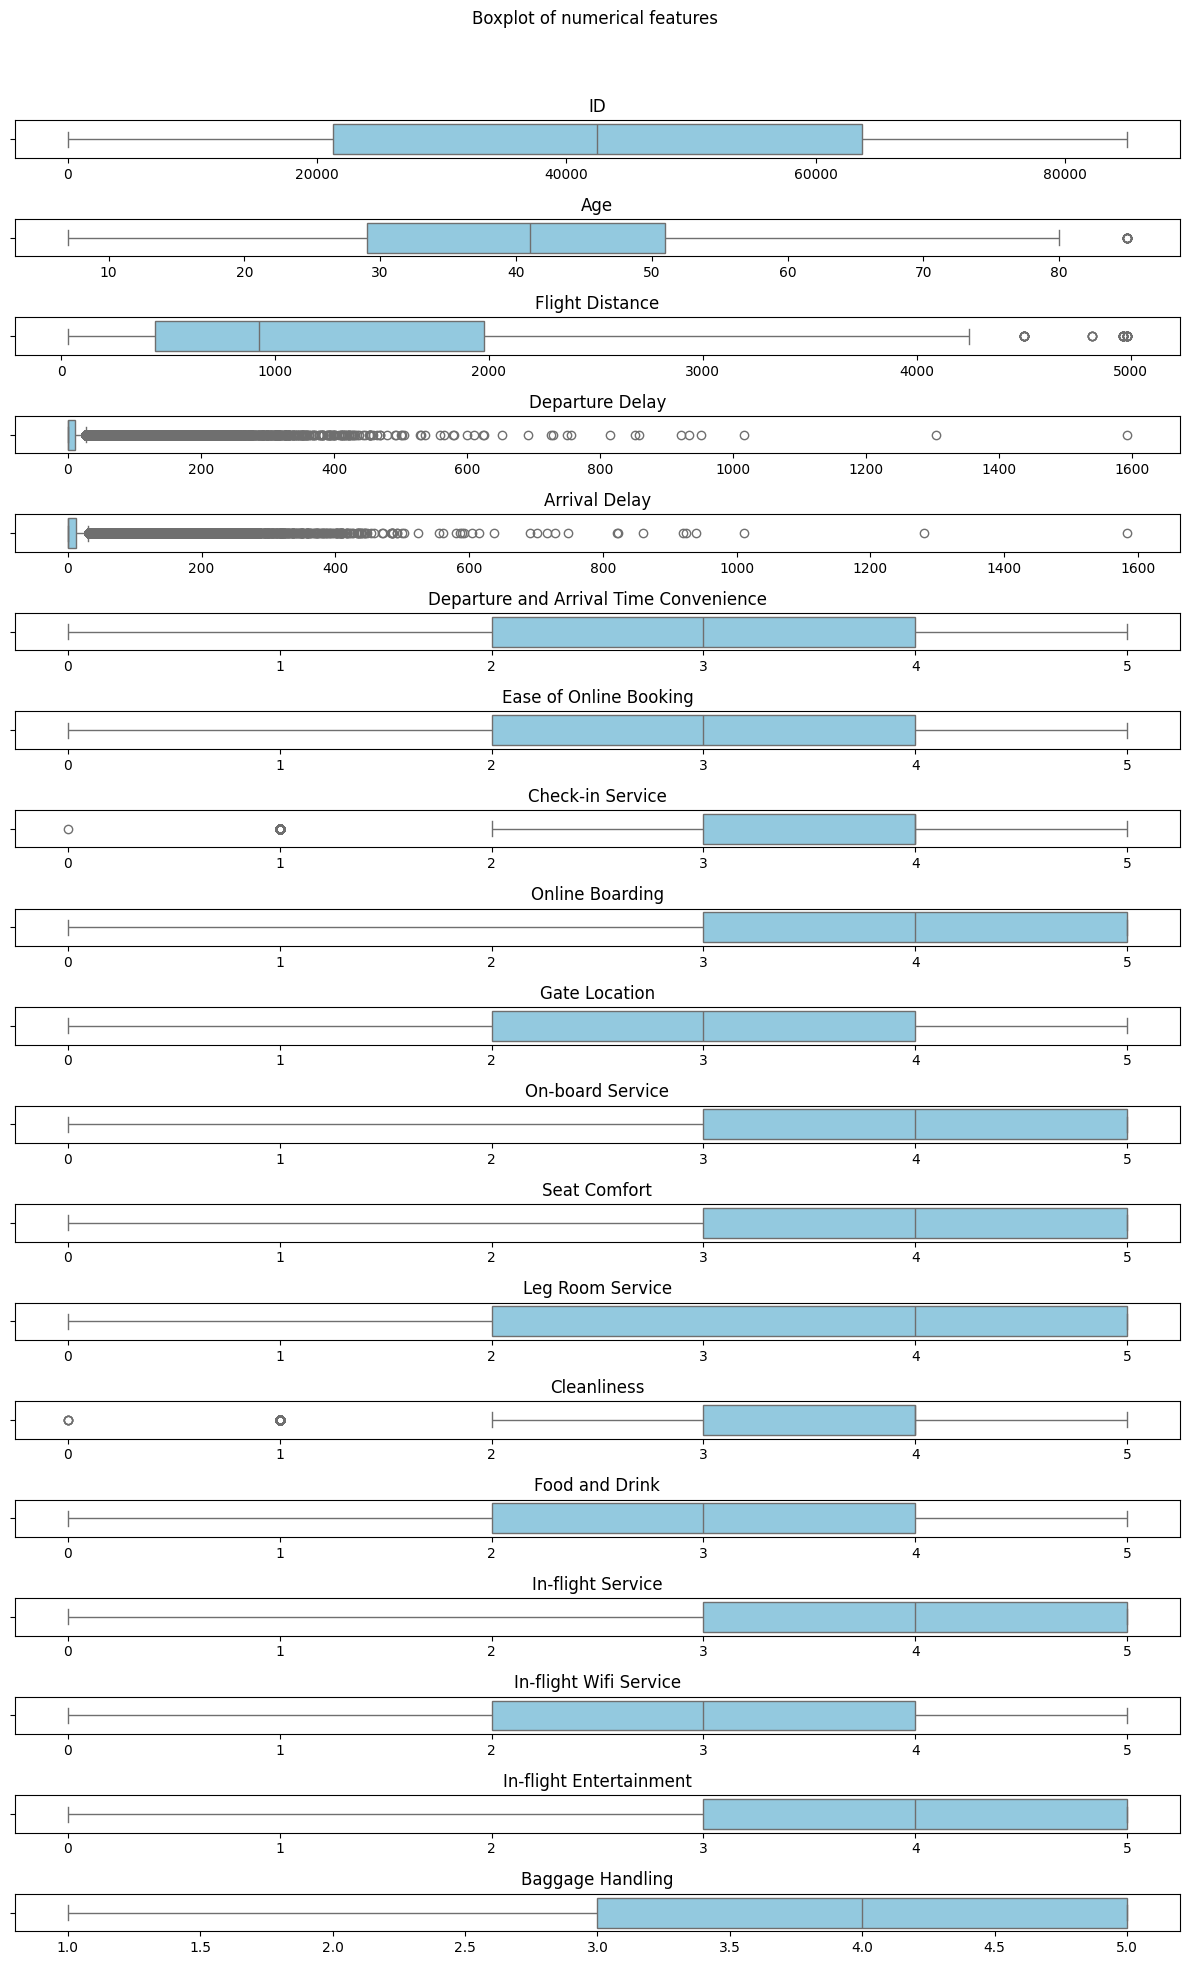

In [ ]:

fig, axs = plt.subplots(nrows=len(df.select_dtypes(include=['number']).columns), figsize=(12, 20))
fig.suptitle('Boxplot of numerical features')

for ax, column in zip(axs, df.select_dtypes(include=['number']).columns):
    sns.boxplot(x=df[column], ax=ax, color='skyblue')
    ax.set_title(column)
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Распределения числовых признаков

Построим визуализацию распределений числовых признаков

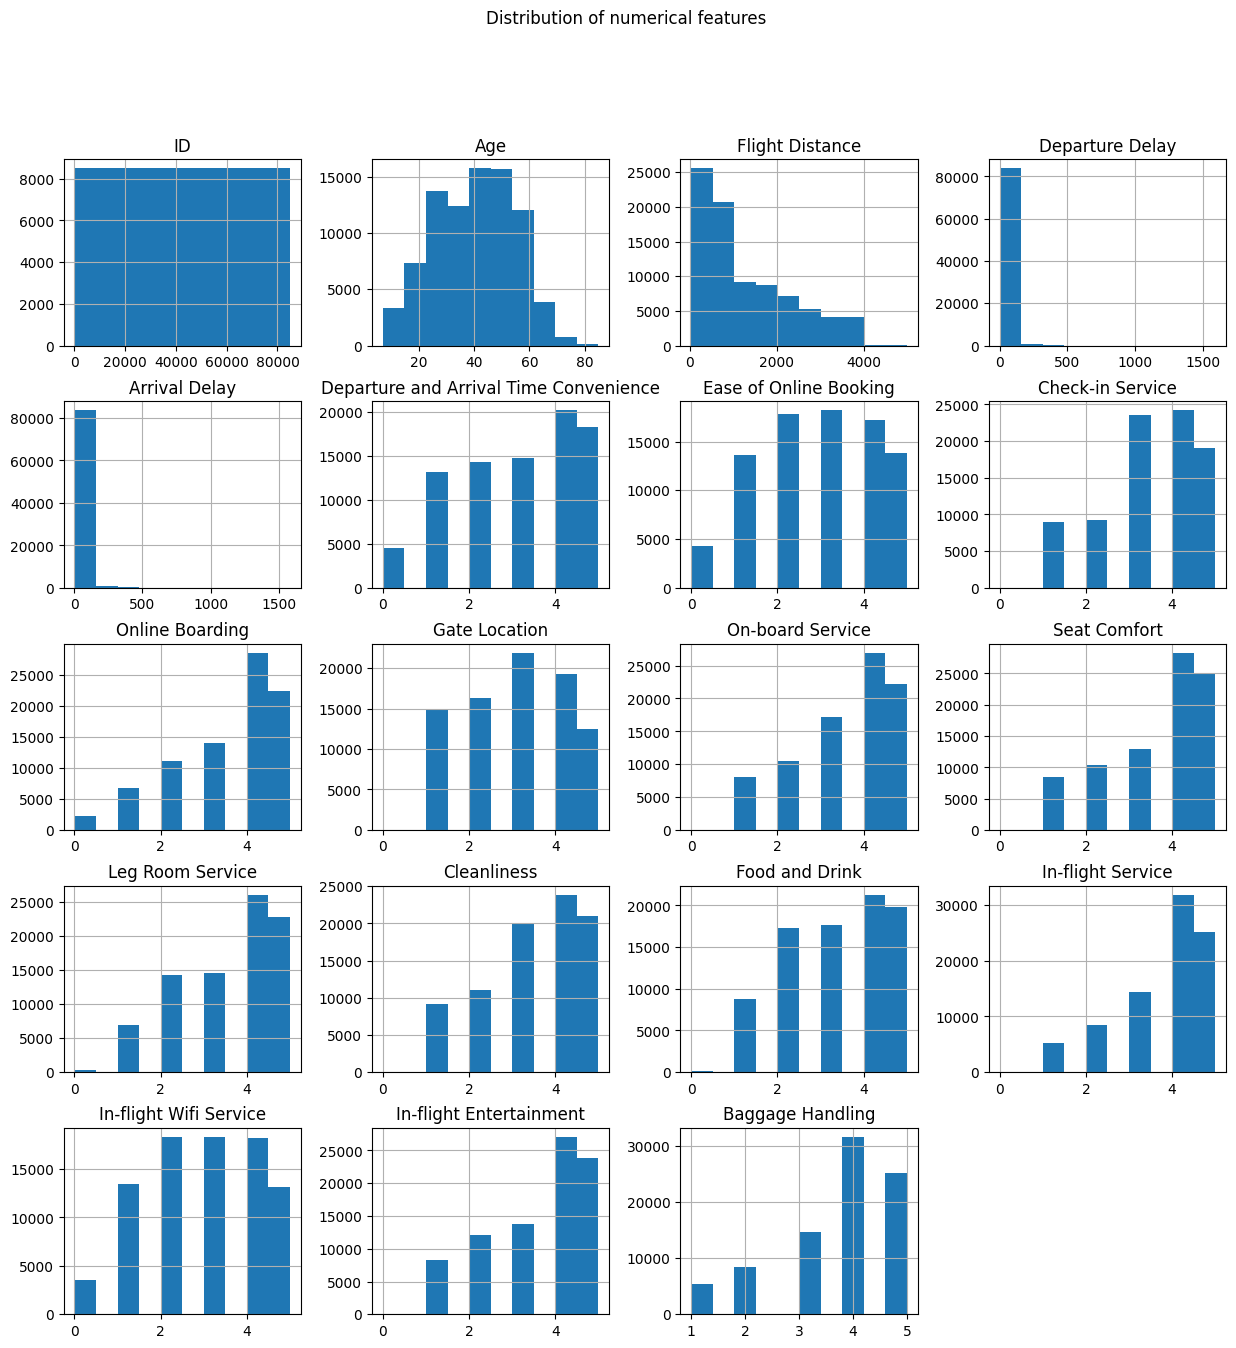

In [ ]:
df.hist(figsize=(15, 15))
plt.suptitle("Distribution of numerical features")
plt.show()

### Распределение целевой переменной

Построим визуализацию распределения целевой переменной удовлетворённости полётом (Satisfaction)  
Видим, что в тренировочных данных большая часть пассажиров (более 50000 человек) довольна полётом

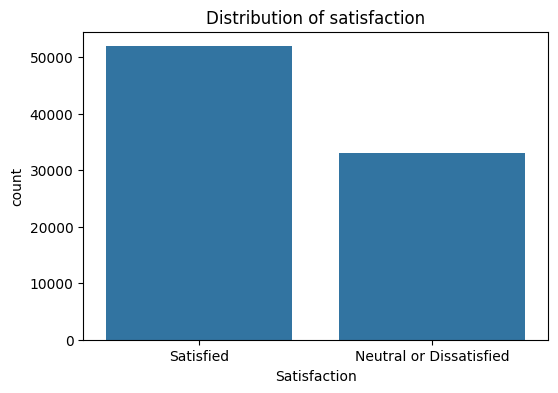

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Satisfaction")
plt.title("Distribution of satisfaction")
plt.show()

Преобразуем значения категориальных признаков в числа для лучшего анализа и дальнейшего предсказания

In [ ]:
df['Satisfaction'] = df['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})

categorical_maps = {
    'Gender': {'Male': 1, 'Female': 0},
    'Customer Type': {'First-time': 0, 'Returning': 1},
    'Type of Travel': {'Personal': 0, 'Business': 1},
    'Class': {'Economy': 0, 'Economy Plus': 1, 'Business': 2}
}

for dataset in [df, test_df]:
    for col, categorial_map in categorical_maps.items():
        dataset[col] = dataset[col].map(categorial_map)
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,1,46,1,1,2,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,1
1,56913,1,30,1,1,2,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,0
2,6541,0,50,1,1,2,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,1
3,40646,0,48,1,1,0,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,1
4,29947,0,24,1,1,1,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,53730,1,49,0,1,2,1310,0,0.0,3,...,4,3,2,3,3,4,4,3,4,0
84963,82113,1,7,1,0,1,650,0,0.0,3,...,2,1,4,1,1,4,2,1,3,0
84964,54411,0,19,1,0,0,363,0,0.0,5,...,5,5,3,5,5,5,3,5,5,0
84965,15247,1,58,1,1,2,3445,9,5.0,1,...,5,5,5,3,5,5,1,5,5,1


### Матрица корреляции для всех переменных


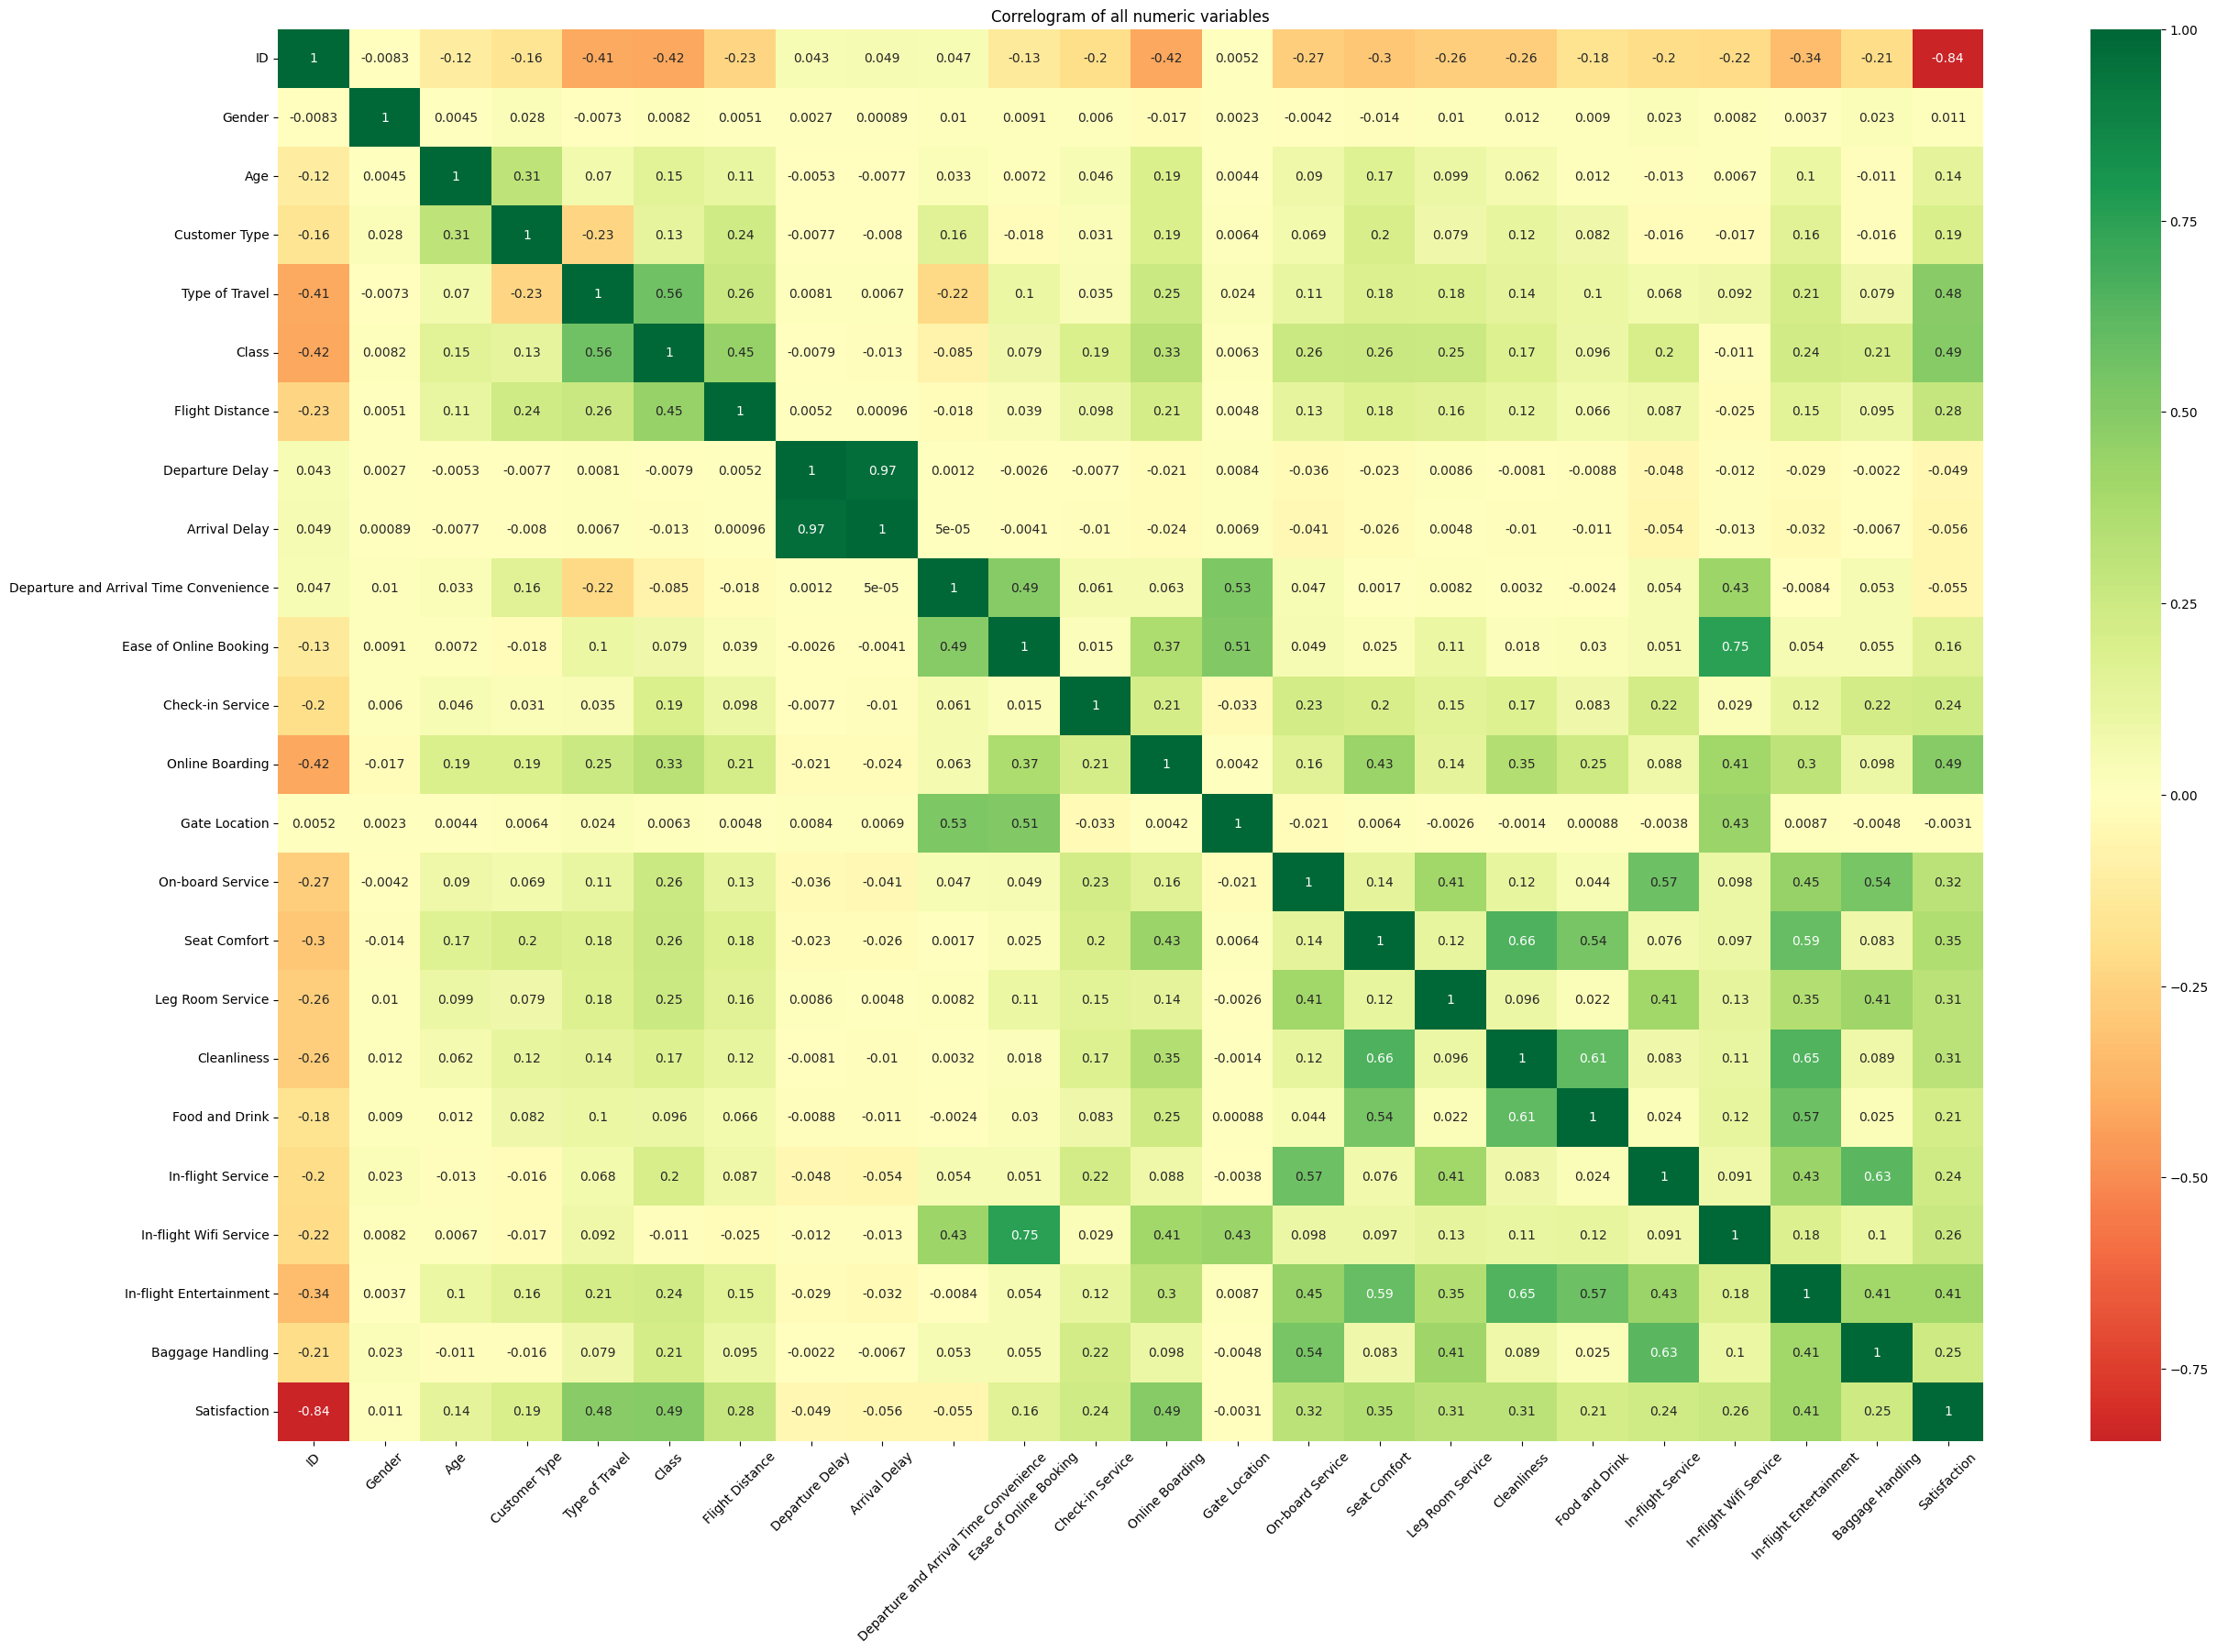

In [ ]:
def show_corr_matrix():
  plt.figure(figsize=(30,20))
  sns.heatmap(df.corr(numeric_only=True), xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='RdYlGn', center=0, annot=True)
  plt.title('Correlogram of all numeric variables')
  plt.xticks(rotation=45)

  plt.show()

show_corr_matrix()

По матрице видно сильную корреляцию независимых признаков Departure Delay и Arrival Delay (0.97), что может вызвать мультиколлинеарность. При этом у Arrival Delay имеются пропуски, следовательно, лучше всего будет исключить эту переменную.

In [ ]:
df.drop(['Arrival Delay', 'Gate Location', 'Gender', 'Departure Delay'], axis=1, inplace=True)
test_df.drop(['Arrival Delay', 'Gate Location', 'Gender', 'Departure Delay'], axis=1, inplace=True)
# show_corr_matrix()

## Выполнение предсказания на основе данных

In [ ]:
x = df.drop(['ID', 'Satisfaction'], axis=1)
y = df['Satisfaction']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced'
)

model.fit(x_train, y_train)

y_pred = model.predict(x_val)
accuracy_score(y_val, y_pred)


0.9583382370248323

In [ ]:
test_features = test_df.drop(['ID'], axis=1)
test_predictions = model.predict(test_features)

submission = pd.DataFrame({
    'ID': test_df['ID'],
    'Satisfaction': test_predictions
})

submission.to_csv("submission.csv", index=False)
submission.head()

,ID,Satisfaction
0,98190,0
1,107961,0
2,129503,0
3,92408,0
4,117611,0
